# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

 # Load Data

In [3]:
path = r'C:\AOU 2nd First Term\MSC\Project\New folder\diabetes.csv'
data = pd.read_csv(path)

# Data Exploration :


##  Display basic information about the dataset



In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,450.0,4.146667,3.544286,0.000,1.000,3.000,7.000,17.000
Glucose,450.0,126.208889,33.015970,0.000,102.000,124.000,148.000,199.000
BloodPressure,450.0,69.073333,20.168256,0.000,64.000,72.000,80.000,122.000
SkinThickness,450.0,21.033333,16.467860,0.000,0.000,24.000,33.000,99.000
Insulin,450.0,86.624444,120.832428,0.000,0.000,36.500,140.000,744.000
BMI,450.0,32.626444,7.890906,0.000,27.925,32.800,37.075,67.100
DiabetesPedigreeFunction,450.0,0.485584,0.342898,0.078,0.248,0.375,0.652,2.329
Age,450.0,34.184444,11.578693,21.000,25.000,31.000,42.000,72.000
Outcome,450.0,0.500000,0.500556,0.000,0.000,0.500,1.000,1.000


## Check for missing values and duplicates

In [5]:
print("Missing values:\n", data.isnull().sum())
duplicate_rows = data[data.duplicated()]
print("No. of duplicate rows: ", duplicate_rows.shape[0])

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
No. of duplicate rows:  0


# Extract Features and Target


In [6]:
X = data.iloc[ :  ,  :  -1]
y = data.iloc[ : , -1]

# Data Scaling

In [7]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

# Data Splitting

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle = True)

# Random Forest

In [9]:
clf = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=10,random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

# Evaluate Random Forest model

In [10]:
train_accuracy_rf = accuracy_score(y_train, clf.predict(X_train))
test_accuracy_rf = accuracy_score(y_test, clf.predict(X_test))

print(f'Training Accuracy: {train_accuracy_rf:.4f}')
print(f'Test Accuracy: {test_accuracy_rf:.4f}')

Training Accuracy: 1.0000
Test Accuracy: 0.7222


# Hyperparameter tuning with GridSearchCV for Random Forest

In [11]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=0), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

# Best parameters for Random Forest

In [12]:
best_params_rf = grid_search_rf.best_params_
print('Best Hyperparameters (Random Forest):', best_params_rf)

Best Hyperparameters (Random Forest): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


# Evaluate the tuned Random Forest model

In [13]:
tuned_train_accuracy_rf = accuracy_score(y_train, grid_search_rf.predict(X_train))
tuned_test_accuracy_rf = accuracy_score(y_test, grid_search_rf.predict(X_test))

print(f'Tuned Training Accuracy (Random Forest): {tuned_train_accuracy_rf:.4f}')
print(f'Tuned Test Accuracy (Random Forest): {tuned_test_accuracy_rf:.4f}')

Tuned Training Accuracy (Random Forest): 0.9194
Tuned Test Accuracy (Random Forest): 0.7333


# Random Forest Graph before and after tunning

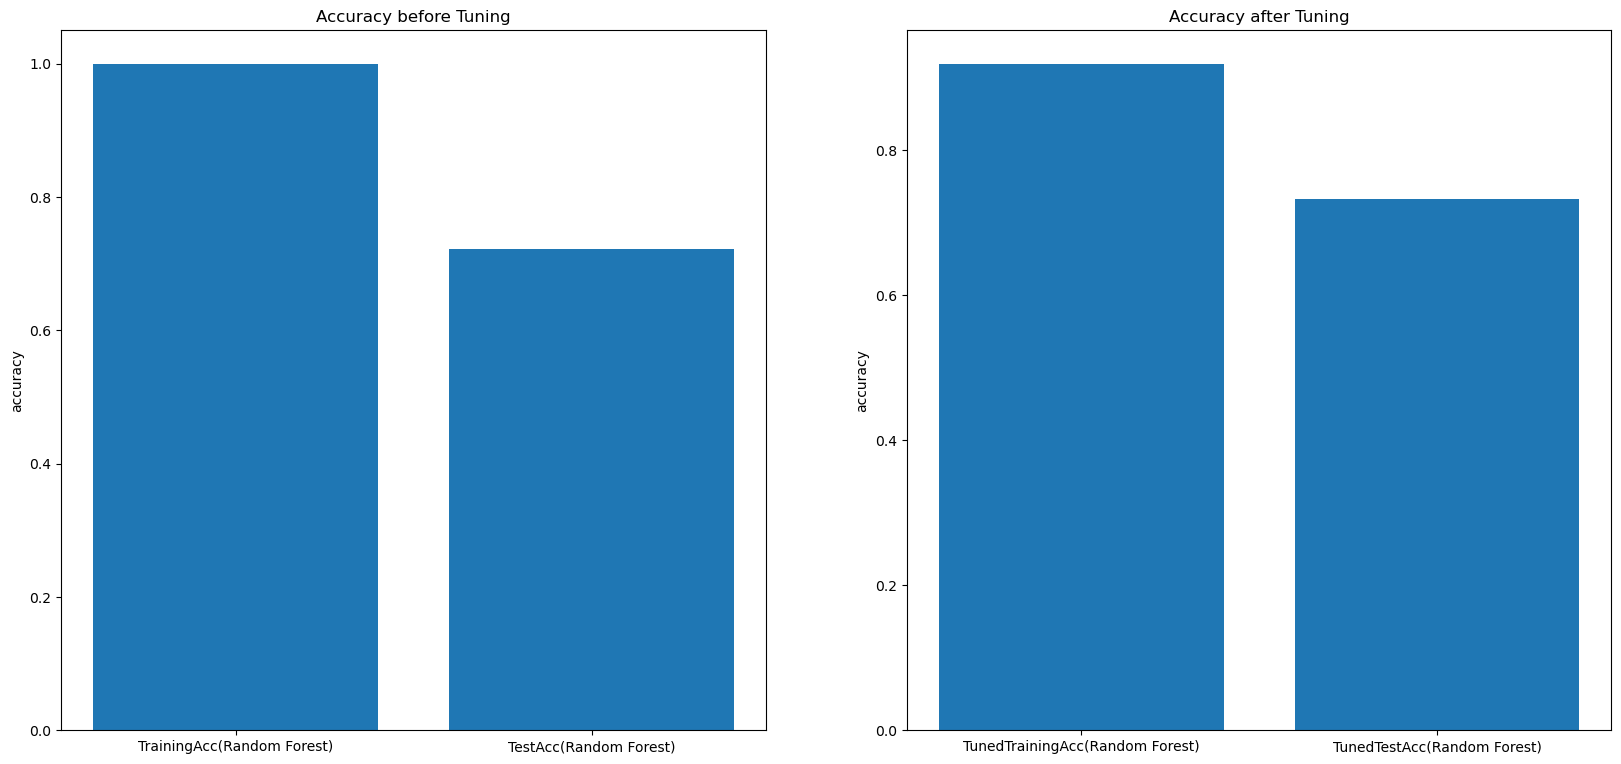

In [14]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
x = ['TrainingAcc(Random Forest)','TestAcc(Random Forest)']
y = [train_accuracy_rf, test_accuracy_rf]
plt.ylabel("accuracy")
plt.title('Accuracy before Tuning')
plt.bar(x, y)

plt.subplot(2,2,2)
x = ['TunedTrainingAcc(Random Forest)', 'TunedTestAcc(Random Forest)']
y = [tuned_train_accuracy_rf, tuned_test_accuracy_rf]
plt.ylabel("accuracy")
plt.title('Accuracy after Tuning')
plt.bar(x, y)
plt.show()

# Gradient Boosting Classifier

In [15]:
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

# Evaluate the Gradient Boosting model

In [16]:
train_accuracy_gb = accuracy_score(y_train, gb_clf.predict(X_train))
test_accuracy_gb = accuracy_score(y_test, gb_clf.predict(X_test))

print(f'Training Accuracy (Gradient Boosting): {train_accuracy_gb:.4f}')
print(f'Test Accuracy (Gradient Boosting): {test_accuracy_gb:.4f}')

Training Accuracy (Gradient Boosting): 0.9667
Test Accuracy (Gradient Boosting): 0.7222


# Hyperparameter tuning with GridSearchCV for Gradient Boosting

In [17]:
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=0), param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

# Best parameters for Gradient Boosting

In [18]:
best_params_gb = grid_search_gb.best_params_
print('Best Hyperparameters (Gradient Boosting):', best_params_gb)

Best Hyperparameters (Gradient Boosting): {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}


# Evaluate the tuned Gradient Boosting model

In [19]:
tuned_train_accuracy_gb = accuracy_score(y_train, grid_search_gb.predict(X_train))
tuned_test_accuracy_gb = accuracy_score(y_test, grid_search_gb.predict(X_test))

print(f'Tuned Training Accuracy (Gradient Boosting): {tuned_train_accuracy_gb:.4f}')
print(f'Tuned Test Accuracy (Gradient Boosting): {tuned_test_accuracy_gb:.4f}')

Tuned Training Accuracy (Gradient Boosting): 1.0000
Tuned Test Accuracy (Gradient Boosting): 0.7111


# Gradient Boosting Graph before and after tunning

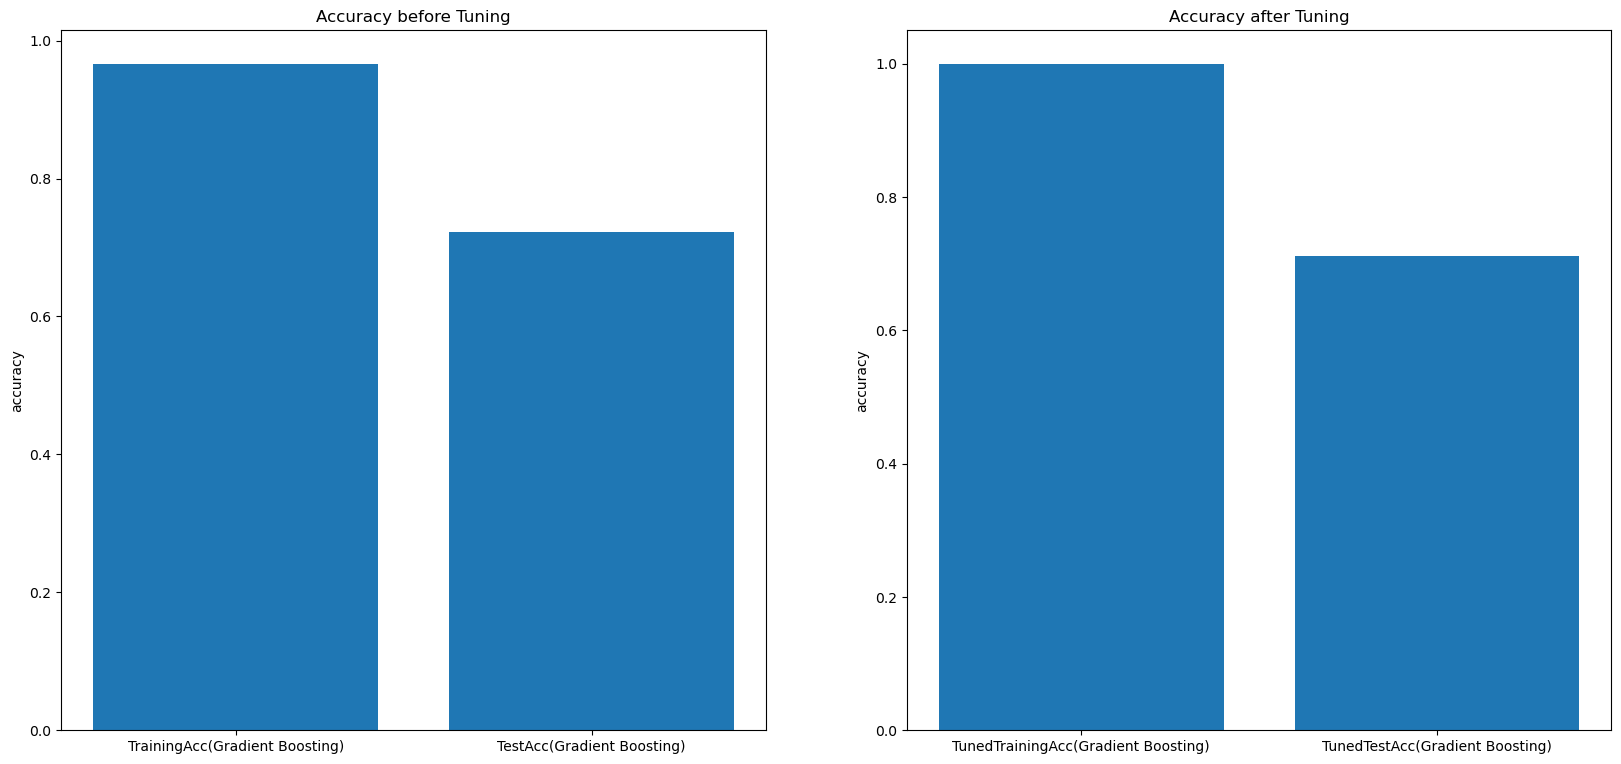

In [20]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
x = ['TrainingAcc(Gradient Boosting)','TestAcc(Gradient Boosting)']
y = [train_accuracy_gb, test_accuracy_gb]
plt.ylabel("accuracy")
plt.title('Accuracy before Tuning')
plt.bar(x, y)

plt.subplot(2,2,2)
x = ['TunedTrainingAcc(Gradient Boosting)', 'TunedTestAcc(Gradient Boosting)']
y = [tuned_train_accuracy_gb, tuned_test_accuracy_gb]
plt.ylabel("accuracy")
plt.title('Accuracy after Tuning')
plt.bar(x, y)
plt.show()

# Decision Tree

In [21]:
Dci_tree = DecisionTreeClassifier(random_state=0)
Dci_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

# Evaluate the Decision Tree model

In [22]:
train_accuracy_dct = accuracy_score(y_train, Dci_tree.predict(X_train))
test_accuracy_dct = accuracy_score(y_test, Dci_tree.predict(X_test))

print(f'Training Accuracy (Decision Tree): {train_accuracy_gb:.4f}')
print(f'Test Accuracy (Decision Tree): {test_accuracy_gb:.4f}')

Training Accuracy (Decision Tree): 0.9667
Test Accuracy (Decision Tree): 0.7222


# Hyperparameter tuning with GridSearchCV for Decision Tree

In [23]:
param_grid_dct = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dct = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid_dct, cv=5, scoring='accuracy')
grid_search_dct.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

# Best parameters for Decision Tree

In [24]:
best_params_dct = grid_search_dct.best_params_
print('Best Hyperparameters (Decision Tree):', best_params_dct)

Best Hyperparameters (Decision Tree): {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


# Evaluate the tuned Decision Tree

In [25]:
tuned_train_accuracy_dct = accuracy_score(y_train, grid_search_dct.predict(X_train))
tuned_test_accuracy_dct = accuracy_score(y_test, grid_search_dct.predict(X_test))

print(f'Tuned Training Accuracy (Decision Tree): {tuned_train_accuracy_dct:.4f}')
print(f'Tuned Test Accuracy (Decision Tree): {tuned_test_accuracy_dct:.4f}')

Tuned Training Accuracy (Decision Tree): 0.8972
Tuned Test Accuracy (Decision Tree): 0.7000


# Decision Tree Graph before and after tunning

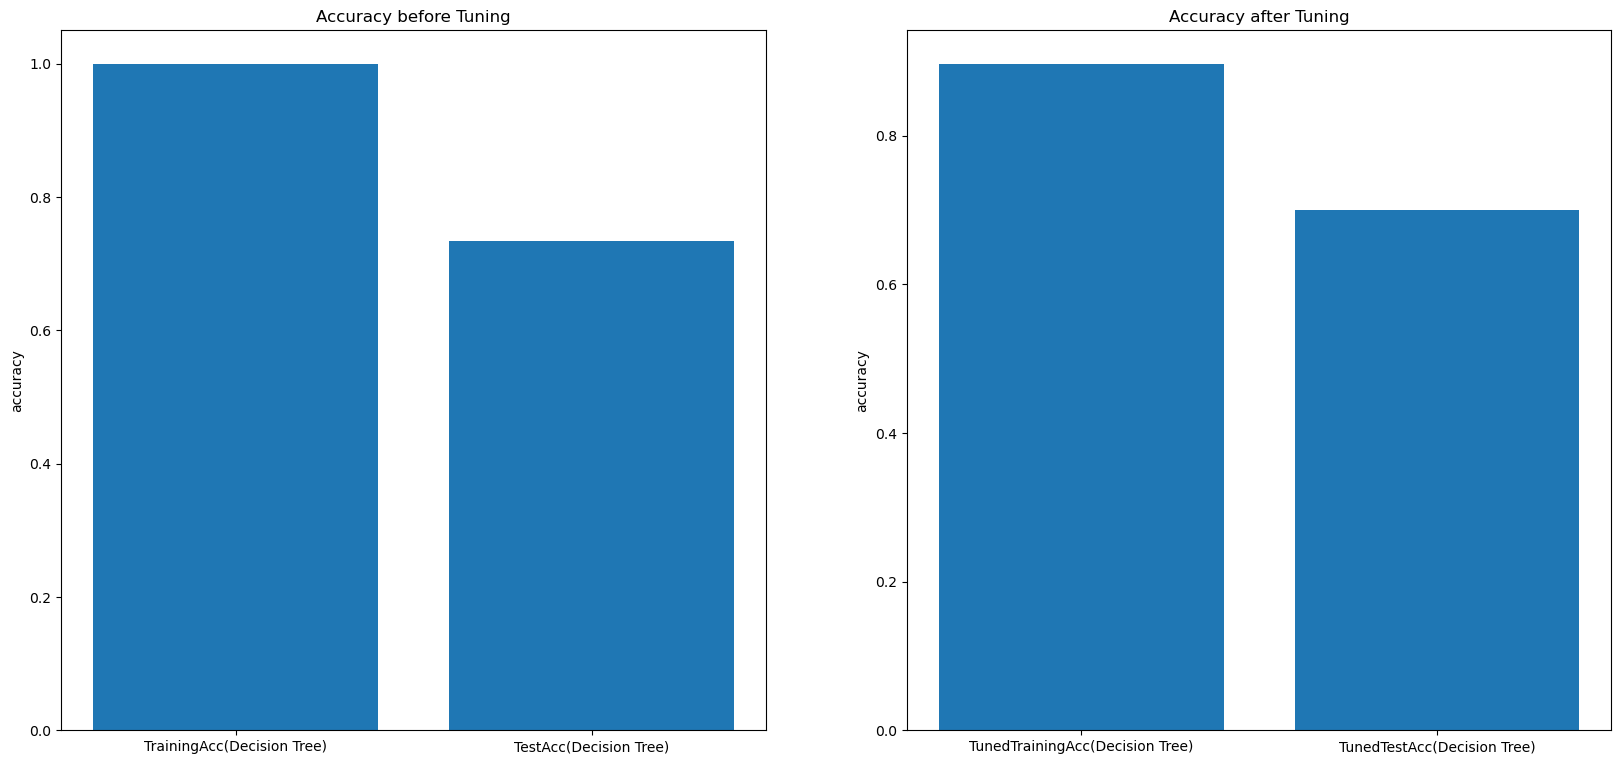

In [26]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
x = ['TrainingAcc(Decision Tree)','TestAcc(Decision Tree)']
y = [train_accuracy_dct, test_accuracy_dct]
plt.ylabel("accuracy")
plt.title('Accuracy before Tuning')
plt.bar(x, y)

plt.subplot(2,2,2)
x = ['TunedTrainingAcc(Decision Tree)', 'TunedTestAcc(Decision Tree)']
y = [tuned_train_accuracy_dct, tuned_test_accuracy_dct]
plt.ylabel("accuracy")
plt.title('Accuracy after Tuning')
plt.bar(x, y)
plt.show()

# Extracting the columns from the data

In [27]:
glucose = data['Glucose']
blood_pressure = data['BloodPressure']
skin_thickness = data['SkinThickness']
insulin = data['Insulin']
bmi = data['BMI']
age = data['Age']

# Create a scatter plot

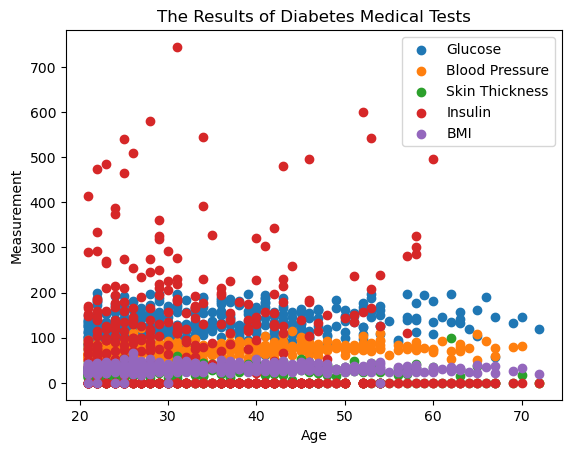

In [28]:
plt.scatter(age, glucose, label='Glucose')
plt.scatter(age, blood_pressure, label='Blood Pressure')
plt.scatter(age, skin_thickness, label='Skin Thickness')
plt.scatter(age, insulin, label='Insulin')
plt.scatter(age, bmi, label='BMI')

# Setting the plot title and labels
plt.title('The Results of Diabetes Medical Tests')
plt.xlabel('Age')
plt.ylabel('Measurement')

# Showing the plot
plt.legend()
plt.show()

## This graph represents the features of our data over the age of the patient 

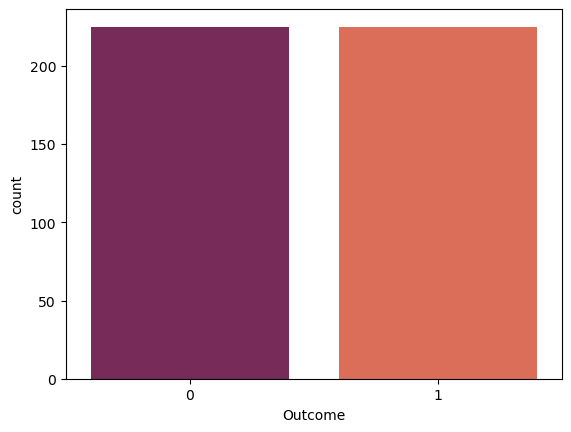

In [29]:
sns.countplot(x = data["Outcome"], palette = 'rocket')
plt.show()

## This graph represents the outcomes of the data either dabetic or not. Since the outcomes are equal, it won't affect the performance of our model and its accuracy.

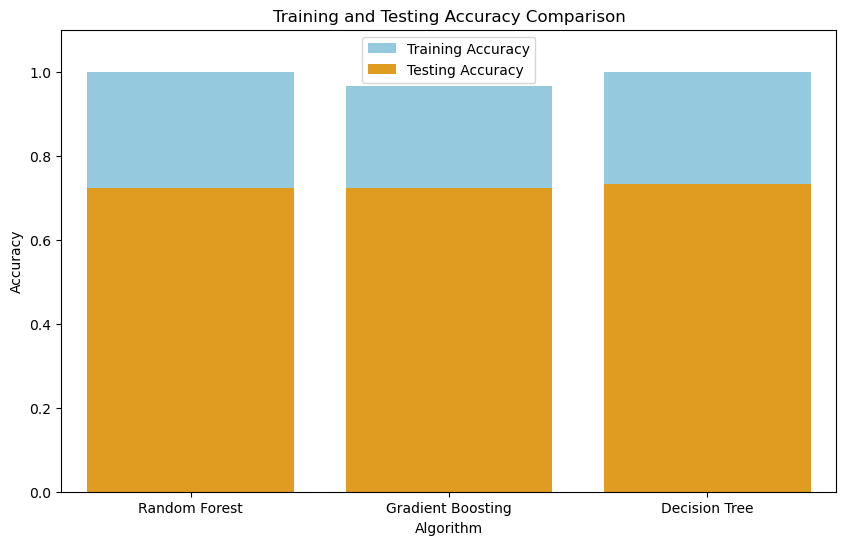

In [31]:
algorithms = ['Random Forest', 'Gradient Boosting', 'Decision Tree']

train_accuracies = [train_accuracy_rf, train_accuracy_gb, train_accuracy_dct]

test_accuracies = [test_accuracy_rf, test_accuracy_gb, test_accuracy_dct]

accuracy_df = pd.DataFrame({'Algorithm': algorithms, 'Training Accuracy': train_accuracies, 'Testing Accuracy': test_accuracies})

plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='Training Accuracy', data=accuracy_df, color='skyblue', label='Training Accuracy')
sns.barplot(x='Algorithm', y='Testing Accuracy', data=accuracy_df, color='orange', label='Testing Accuracy')

plt.title('Training and Testing Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)
plt.legend()
plt.show()

## Before tunning random forest and decision tree there was overfitting in both 

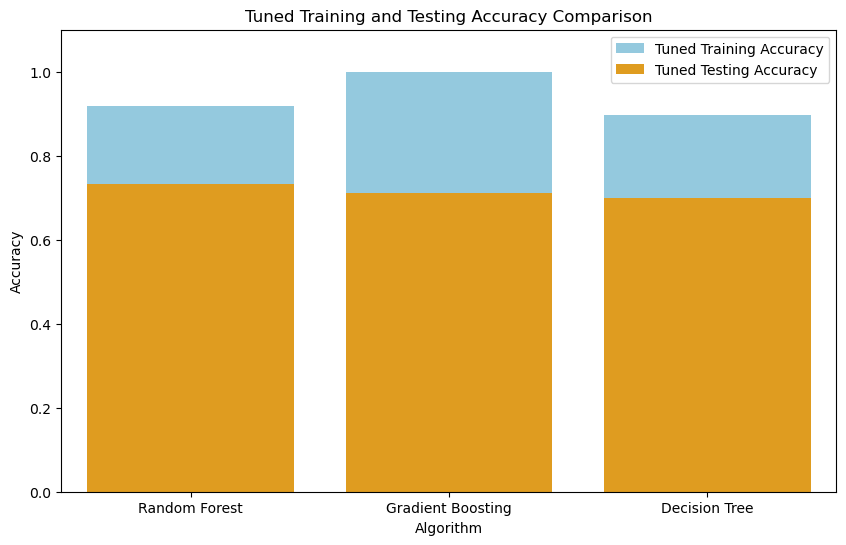

In [36]:
algorithms = ['Random Forest', 'Gradient Boosting', 'Decision Tree']

tuned_train_accuracies = [tuned_train_accuracy_rf, tuned_train_accuracy_gb, tuned_train_accuracy_dct]

tuned_test_accuracies = [tuned_test_accuracy_rf, tuned_test_accuracy_gb, tuned_test_accuracy_dct]

accuracy_df_tuned = pd.DataFrame({'Algorithm': algorithms, 'Tuned Training Accuracy': tuned_train_accuracies, 'Tuned Testing Accuracy': tuned_test_accuracies})

plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='Tuned Training Accuracy', data=accuracy_df_tuned, color='skyblue', label='Tuned Training Accuracy')
sns.barplot(x='Algorithm', y='Tuned Testing Accuracy', data=accuracy_df_tuned, color='orange', label='Tuned Testing Accuracy')

plt.title('Tuned Training and Testing Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)
plt.legend()
plt.show()

## After tunning Gradient Boosting algorithm has an overfitting but Random forest and Decision tree working perfectly otherwise random forest accuracy is better than decision tree. So, we choose ranndom forest algorithm 

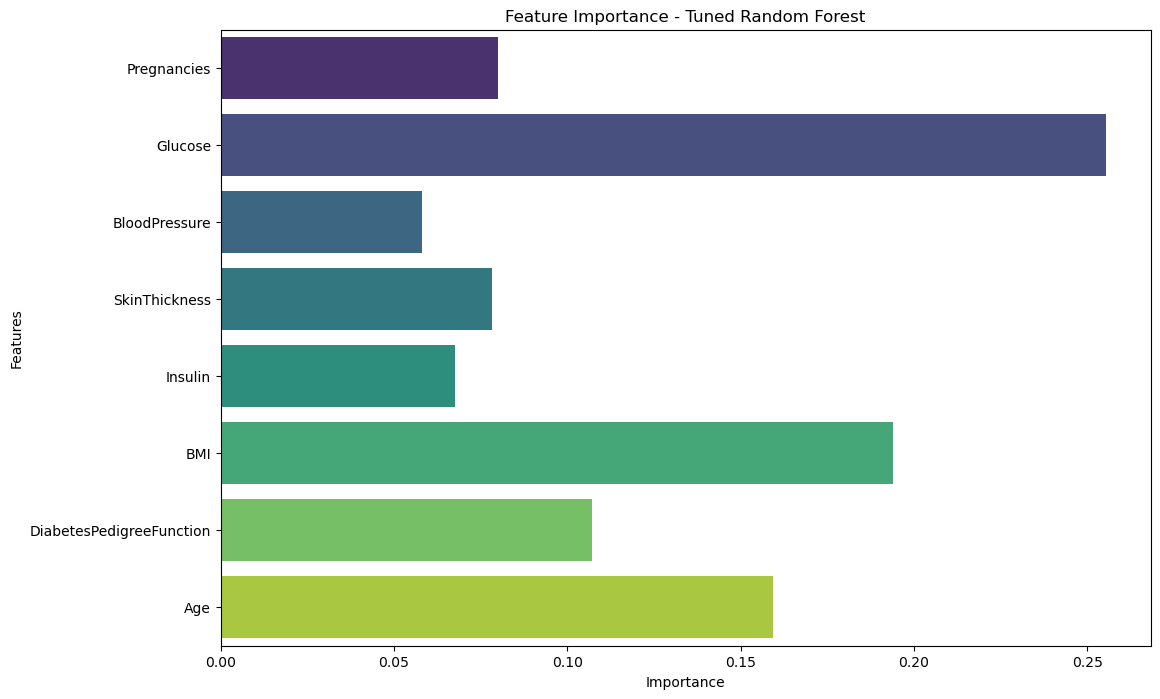

In [39]:
feature_importance = grid_search_rf.best_estimator_.feature_importances_
feature_names = data.columns[:-1]

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=feature_names, palette='viridis')
plt.title('Feature Importance - Tuned Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## After choosing Random Forest algorithm We noticed these features affects our algorithm and here is a graph representing them 